# Fantasy Football Draft Using Genetic Algorithm

***Optimization for AI*'s Exam Project**

*Univesity of Studies of Trieste* - *"Data Science and AI"* Master's Degree A.Y. $2024/2025$

## Data Extraction

In [1]:
import soccerdata as sd

league_list = [
    'ARG-Primera Division',
    'AUT-Austrian Bundesliga', # No Opta Data
    'BEL-Jupiler Pro League',
    'BEL-Challenger Pro League', # No Opta Data
    'BRA-Brasilerao',
    # 'CONMEBOL-Libertadores',
    'ENG-Premier League',
    'ENG-Championship',
    'ENG-League One', # No Opta Data
    'ESP-La Liga',
    'ESP-Segunda Division', # No Opta Data
    'FRA-Ligue 1',
    'FRA-Ligue 2', # No Opta Data
    'GER-Bundesliga',
    'GER-2. Bundesliga', # No Opta Data
    'ITA-Serie A',
    'ITA-Serie B',
    'NED-Eredivisie',
    'POR-Liga Portugal',
    'POL-Ekstraklasa', # No Opta Data
    'RUS-Premier League', # No Opta Data
    'SCO-Premiership', # No Opta Data
    'SUI-Swiss Super League', # No Opta Data
    'TUR-Super Lig', # No Opta Data
    # 'UEFA-Champions League', # International Competition
    'USA-Major League Soccer'
]

fb = sd.FBref(leagues=league_list, seasons=[2023, 2024, 2025])

[09/13/25 16:29:19] INFO     Custom team name replacements loaded from                                ]8;id=327583;file:///Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfootballdraft/lib/python3.11/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=895046;file:///Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfootballdraft/lib/python3.11/site-packages/soccerdata/_config.py#86\86]8;;\
                             /Users/gabrielmasella/soccerdata/config/teamname_replacements.json.                   

                    INFO     Custom league dict loaded from                                          ]8;id=703117;file:///Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfootballdraft/lib/python3.11/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=11487;file:///Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfootballdraft/lib/python3.11/site-packages/soccerdata/_config.py#195\195]8;;\
                             /Users/gabrielmasella/soccerdata/config/league_dict.json.                             

[09/13/25 16:29:20] INFO     Saving cached data to /Users/gabrielmasella/soccerdata/data/FBref       ]8;id=190261;file:///Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfootballdraft/lib/python3.11/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=250643;file:///Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfootballdraft/lib/python3.11/site-packages/soccerdata/_common.py#263\263]8;;\

                    WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=324513;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=429376;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:125:                      
                             UserWarning: The leagues have different default season codes. Using                   
                             multi-year season codes.                                                              
                               return SeasonCode.from_leagues(self.leagues)                                        
                                                                                                                   

                    WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=934300;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=476019;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:98:                       
                             UserWarning: You are trying to scrape data for all of the Big 5                       
                             European leagues. This can be done more efficiently by setting                        
                             leagues='Big 5 European Leagues Combined'.                                            
                               warnings.warn(                                                                      
                                                                                                                   

In [2]:
import warnings

# For sure for all the leagues we have all this informations
# Suppress all UserWarning messages specifically for this section
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    summary_players = fb.read_player_season_stats(stat_type="standard")
    shoot_stats = fb.read_player_season_stats(stat_type="shooting")
    misc_stats = fb.read_player_season_stats(stat_type="misc")
    keeper_stats = fb.read_player_season_stats(stat_type="keeper")

# Additional information for the players with coverage
# passing_stats = fb.read_player_season_stats(stat_type="passing_types")
# defense_stats = fb.read_player_season_stats(stat_type="defense")
# keeper_adv_stats = fb.read_player_season_stats(stat_type="keeper_adv")

                    WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=334468;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=642514;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:165:                      
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[09/13/25 16:29:33] WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=314669;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=144038;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:1273:                     
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               return pd.concat(dfs)                                                               
                                                                                                                   

                    WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=328259;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=372962;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:165:                      
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[09/13/25 16:29:43] WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=615651;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=493865;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:1273:                     
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               return pd.concat(dfs)                                                               
                                                                                                                   

                    WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=299724;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=992174;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:165:                      
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[09/13/25 16:29:53] WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=779749;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=820495;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:1273:                     
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               return pd.concat(dfs)                                                               
                                                                                                                   

                    WARNING  /Users/gabrielmasella/github_projects/FantasyFootballDraft/.fantasyfoo ]8;id=848533;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=980976;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             tballdraft/lib/python3.11/site-packages/soccerdata/fbref.py:165:                      
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [3]:
summary_players = summary_players[[
    (        'nation',         ''),
    (        'pos',           ''),
    (        'age',           ''),
    (  'Playing Time',       'MP'),
    (  'Playing Time',   'Starts'),
    (  'Playing Time',      'Min'),
    (  'Playing Time',      '90s'),
    (   'Performance',      'Gls'),
    (   'Performance',      'Ast'),
    (   'Performance',       'PK'),
    (   'Performance',    'PKatt'),
    (   'Performance',     'CrdY'),
    (   'Performance',     'CrdR'),
]]

shoot_stats = shoot_stats[[
    ('Standard',      'Sh'),
    ('Standard',     'SoT')
]]

misc_stats = misc_stats[[
    ( 'Performance',   'Fls'),
    ( 'Performance',   'Fld'),
    ( 'Performance',   'Off'),
    ( 'Performance',   'Crs'),
    ( 'Performance',   'Int'),
    ( 'Performance',  'TklW'),
]]

keeper_stats = keeper_stats[[
    (  'Performance',     'GA'),
    (  'Performance',   'SoTA'),
    (  'Performance',  'Saves'),
    (  'Performance',     'CS'),
    ('Penalty Kicks',  'PKatt'),
    ('Penalty Kicks',   'PKsv')
]]

In [4]:
# Join all the stats together
basic_player_stats = summary_players.join(shoot_stats, how='outer').join(
    misc_stats, how='outer').join(keeper_stats, how='left')

basic_player_stats["first_pos"] = basic_player_stats["pos"].str.split(",").str[0]
# remove the pos column
basic_player_stats = basic_player_stats.drop(columns=["pos"])

[09/13/25 16:29:54] WARNING  /var/folders/y4/071n1shn1vz2cc6k8x71t0qr0000gn/T/ipykernel_2947/167897 ]8;id=533224;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=70849;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             1322.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index                
                             without a level parameter may impact performance.                                     
                               basic_player_stats = basic_player_stats.drop(columns=["pos"])                       
                                                                                                                   

In this cell I'm adding an important GK that didn't played for an entire season, but was one of the biggest goalkeeper of this decade and after a one-year stop, he decided to sign a contract with Fiorentina. I added the stats so that the algorithm has the possibility to choose this player.

In [5]:
# I need to add a row to basic_player_stats with the stats of David de Gea from 2022/2023 season with Manchester United
david_stats = {
    'nation': 'ESP',
    'age': 31,
    'first_pos': 'GK',
    'Playing Time': {
        'MP': 38,
        'Starts': 38,
        'Min': 38*90,
        '90s': 38
    },
    'Performance': {
        'GA': 43,
        'SoTA': 142,
        'Saves': 99,
        'CS': 17,
    },
    'Penalty Kicks': {
        'PKatt': 3,
        'PKsv': 1,
    }
}

# I need to convert the dictionary to a pandas row for the basic_player_stats dataframe with multindex (league, season, team, player)
import pandas as pd

# create an empty Series whose index matches the dataframe columns
david_stats_row = pd.Series(index=basic_player_stats.columns)

# fill top-level fields (note: column second-level keys are empty strings)
david_stats_row[('nation', '')] = david_stats.get('nation')
david_stats_row[('age', '')] = david_stats.get('age')
david_stats_row[('first_pos', '')] = david_stats.get('first_pos')

# fill nested Playing Time fields
for subk, val in david_stats.get('Playing Time', {}).items():
    david_stats_row[('Playing Time', subk)] = val

# fill nested Performance fields
for subk, val in david_stats.get('Performance', {}).items():
    david_stats_row[('Performance', subk)] = val

# fill Penalty Kicks fields
for subk, val in david_stats.get('Penalty Kicks', {}).items():
    david_stats_row[('Penalty Kicks', subk)] = val

# create a single-row DataFrame and concat
row_name = ('ENG-Premier League', '2324', 'Manchester Utd', 'David de Gea')
new_row_df = david_stats_row.to_frame().T
new_row_df.index = pd.MultiIndex.from_tuples([row_name], names=basic_player_stats.index.names)

basic_player_stats = pd.concat([basic_player_stats, new_row_df], axis=0)

                    WARNING  /var/folders/y4/071n1shn1vz2cc6k8x71t0qr0000gn/T/ipykernel_2947/214172 ]8;id=839069;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=203072;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             0637.py:31: FutureWarning: Setting an item of incompatible dtype is                   
                             deprecated and will raise an error in a future version of pandas.                     
                             Value 'ESP' has dtype incompatible with float64, please explicitly                    
                             cast to a compatible dtype first.                                                     
                               david_stats_row[('nation', '')] = david_stats.get('nation')                         
                                                                                                                   

                    WARNING  /var/folders/y4/071n1shn1vz2cc6k8x71t0qr0000gn/T/ipykernel_2947/214172 ]8;id=414259;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=251042;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             0637.py:52: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               basic_player_stats = pd.concat(, axis=0)                                            
                                                                                                                   

In [6]:
# Cast all the numeric columns to appropriate types
basic_player_stats[('Playing Time', 'MP')] = basic_player_stats[('Playing Time', 'MP')].astype('Int64')
basic_player_stats[('Playing Time', 'Starts')] = basic_player_stats[('Playing Time', 'Starts')].astype('Int64')
basic_player_stats[('Playing Time', 'Min')] = basic_player_stats[('Playing Time', 'Min')].astype('Int64')
basic_player_stats[('Playing Time', '90s')] = basic_player_stats[('Playing Time', '90s')].astype('Float64')
basic_player_stats[('Performance', 'GA')] = basic_player_stats[('Performance', 'GA')].astype('Int64')
basic_player_stats[('Performance', 'SoTA')] = basic_player_stats[('Performance', 'SoTA')].astype('Int64')
basic_player_stats[('Performance', 'Saves')] = basic_player_stats[('Performance', 'Saves')].astype('Int64')
basic_player_stats[('Performance', 'CS')] = basic_player_stats[('Performance', 'CS')].astype('Int64')
basic_player_stats[('Penalty Kicks', 'PKatt')] = basic_player_stats[('Penalty Kicks', 'PKatt')].astype('Int64')
basic_player_stats[('Penalty Kicks', 'PKsv')] = basic_player_stats[('Penalty Kicks', 'PKsv')].astype('Int64')

# Take the players from the 2025/2026 season and conver their age to int from string dd-yyyy
basic_player_stats[('age', '')] = basic_player_stats[('age', '')].apply(lambda x: int(x.split('-')[0]) if isinstance(x, str) and '-' in x else x).astype('Int64')

In [7]:
# We have to delete the duplicate rows in the dataframe
basic_player_stats = basic_player_stats[~basic_player_stats.index.duplicated(keep='first')]

# Now we have to manage all the players that in the same season played for different teams
# For these players we have to simply remove the rows where the team is not the main one (the one with more minutes played)
multi_team_players = basic_player_stats.index.to_frame(index=False).groupby(['season', 'player']).filter(lambda x: len(x) > 1)

for season, player in multi_team_players[['season', 'player']].drop_duplicates().itertuples(index=False):
    # Get all entries for this player in this season across all leagues
    player_mask = (basic_player_stats.index.get_level_values('season') == season) & \
                  (basic_player_stats.index.get_level_values('player') == player)
    player_entries = basic_player_stats[player_mask]
    
    if player_entries.empty:
        continue
    
    # Find the entry with the maximum minutes played
    max_min_idx = player_entries[('Playing Time', 'Min')].idxmax()
    
    # Drop all other entries for this player in this season
    entries_to_drop = player_entries.index.difference([max_min_idx])
    basic_player_stats = basic_player_stats.drop(entries_to_drop)

## Dataset Creation

In this part we will create all the features for the simulation of the Fantasy Football League environment, where, based on the performances of the last year we calculate the accumulated point during a season as a starting point for the expected points for the season after.  
The rules are inspired to the rules of the Kickest's Fantasy League, where I tried to replicate the possible bonus with the information we have a disposal in the different leagues (not all of them have precise informations, because of the coverge of the profider, FBref).  
The points are assigned in the following way:
- For every starts 5 points, while for every substitute appearance 2 points
- For every goal: if forwards 14, if midfielders 16, if defenders 18, if goalkeepers 50
- For every penalty goal: 10 points
- For every missed penalty: -10 points
- For every assist: 7 points
- For every yellow card: -2 point 
- For every red card: -5 points
- For every clean sheet (only GK): 10 points
- For every shot on target: 2 point
- For every shot: 1 point 
- For every foul: -1 points 
- For every foul won: 0.5 points 
- For every offside: -0.5 points 
- For every cross: 0.5 points 
- For every interception: 1 point 
- For every tackle won: 2 points
- For every goal conceded (only GK): -2 points (calculated from GA)
- For every save (only GK): 1 point (calculated from Saves)
- For every penalty save (only GK): 15 points (calculated from PKsv)

In [8]:
# Let's calculate the expected points for each player based on their stats
def calculate_expected_points(row):
    """
    Calculate expected points for a player based on their stats.
    This function handles missing values and safely coerces them to numeric types.
    """
    # helper to safely coerce values to numeric (fallback 0)
    def safe_num(col, default=0.0):
        """
        Safely retrieve a value from the row and convert it to a float.
        If the value is missing or cannot be converted, return the default value.
        """
        val = row.get(col, default)
        if pd.isna(val):
            return default
        try:
            return float(val)
        except Exception:
            return default

    points = 0.0

    # Playing Time
    starts = safe_num(('Playing Time', 'Starts'))
    mp = safe_num(('Playing Time', 'MP'))
    points += starts * 5
    points += (mp - starts) * 2

    # Performance - goals depend on primary position which may be missing
    pos = row.get(('first_pos', ''))
    if pd.isna(pos):
        pos = ''
    pos = str(pos)

    gls = safe_num(('Performance', 'Gls'))
    if pos == 'FW':
        points += gls * 14
    elif pos == 'MF':
        points += gls * 16
    elif pos == 'DF':
        points += gls * 18
    elif pos == 'GK':
        points += gls * 50
    else:
        # if unknown position, use a neutral value (e.g., midfielder)
        points += gls * 16

    pk = safe_num(('Performance', 'PK'))
    pkatt = safe_num(('Performance', 'PKatt'))
    points += pk * 10
    points -= (pkatt - pk) * 10

    ast = safe_num(('Performance', 'Ast'))
    points += ast * 7

    crdy = safe_num(('Performance', 'CrdY'))
    crdr = safe_num(('Performance', 'CrdR'))
    points -= crdy * 2
    points -= crdr * 5

    # Keeper stats (only if the value exists and is numeric)
    ga = row.get(('Performance', 'GA'))
    if not pd.isna(ga):
        points -= safe_num(('Performance', 'GA')) * 2
    cs = row.get(('Performance', 'CS'))
    if not pd.isna(cs):
        points += safe_num(('Performance', 'CS')) * 10

    # Shooting stats
    sot = safe_num(('Standard', 'SoT'))
    sh = safe_num(('Standard', 'Sh'))
    points += sot * 2
    points += (sh - sot) * 1

    # Misc stats
    points -= safe_num(('Performance', 'Fls'))
    points += safe_num(('Performance', 'Fld')) * 0.5
    points -= safe_num(('Performance', 'Off')) * 0.5
    points += safe_num(('Performance', 'Crs')) * 0.5
    points += safe_num(('Performance', 'Int')) * 1
    points += safe_num(('Performance', 'TklW')) * 2

    # Keeper advanced stats
    saves = row.get(('Performance', 'Saves'))
    if not pd.isna(saves):
        points += safe_num(('Performance', 'Saves'))
    pksv = row.get(('Penalty Kicks', 'PKsv'))
    if not pd.isna(pksv):
        points += safe_num(('Penalty Kicks', 'PKsv')) * 15

    return points

# Apply the function to each row (this will handle missing/NA values safely)
basic_player_stats['Seasonal Points'] = basic_player_stats.apply(calculate_expected_points, axis=1)

Instead of using the seasonal points as they are, I decided to calculate **PPM** (Points Per Match), that will used as *expected points per game* for the next season, the parameter that tha algorithm will optimize and maximize in order to choose the selection of players.

In [9]:
# Calculate the maximum number of matches played in each league (using the matches_played dict from cell 12)
matches_played = {
    'ENG-Premier League': 38,
    'ENG-Championship': 46,
    'ESP-La Liga': 38,
    'FRA-Ligue 1': 38,
    'GER-Bundesliga': 34,
    'ITA-Serie A': 38,
    'BEL-Jupiler Pro League': 39,
    'BRA-Brasilerao': 38,
    'NED-Eredivisie': 34,
    'POR-Liga Portugal': 34,
    'USA-Major League Soccer': 34,
    'ITA-Serie B': 38,
    'ARG-Primera Division': 38,
    'AUT-Austrian Bundesliga': 32,
    'BEL-Challenger Pro League': 28,
    'ENG-League One': 46,
    'ESP-Segunda Division': 42,
    'FRA-Ligue 2': 38,
    'GER-2. Bundesliga': 34,
    'POL-Ekstraklasa': 30,
    'RUS-Premier League': 30,
    'SCO-Premiership': 38,
    'SUI-Swiss Super League': 36,
    'TUR-Super Lig': 38,
}

# Add the new PPM column: Seasonal Points divided by the max matches in the league
basic_player_stats['PPM'] = basic_player_stats.apply(
    lambda row: row[('Seasonal Points', '')] / matches_played.get(row.name[0], 38),  # row.name[0] is the league
    axis=1
)

In [10]:
stats_2425 = basic_player_stats.xs("2425", level="season").loc[["ITA-Serie A", "ENG-Premier League", "ESP-La Liga", "FRA-Ligue 1", "GER-Bundesliga"]]
filtered = stats_2425[stats_2425[('Playing Time', '90s')] > 15]
avg_points = filtered.groupby('first_pos')['PPM'].mean()
std_points = filtered.groupby('first_pos')['PPM'].std()
print("\nAverage PPM by Position:")
print(avg_points)
print("\nStandard Deviation of PPM by Position:")
print(std_points)

# Print the top 10 players by points
top_players = filtered.nlargest(10, 'PPM')
print("\nTop 10 Players by PPM:")
print(top_players[['first_pos', 'PPM']])


Average PPM by Position:
first_pos
DF     6.895899
FW    10.909582
GK     6.429622
MF     8.427151
Name: PPM, dtype: float64

Standard Deviation of PPM by Position:
first_pos
DF    2.205652
FW    3.885715
GK    2.001271
MF    2.881399
Name: PPM, dtype: float64

Top 10 Players by PPM:
                                                    first_pos        PPM
                                                                        
league             team          player                                 
ENG-Premier League Liverpool     Mohamed Salah             FW  27.289474
GER-Bundesliga     Bayern Munich Harry Kane                FW  24.323529
ESP-La Liga        Real Madrid   Kylian Mbappé             FW  23.486842
ENG-Premier League Brentford     Bryan Mbeumo              FW  21.960526
ESP-La Liga        Barcelona     Raphinha                  FW  21.368421
ENG-Premier League Chelsea       Cole Palmer               MF  20.881579
FRA-Ligue 1        Marseille     Mason Greenwood         

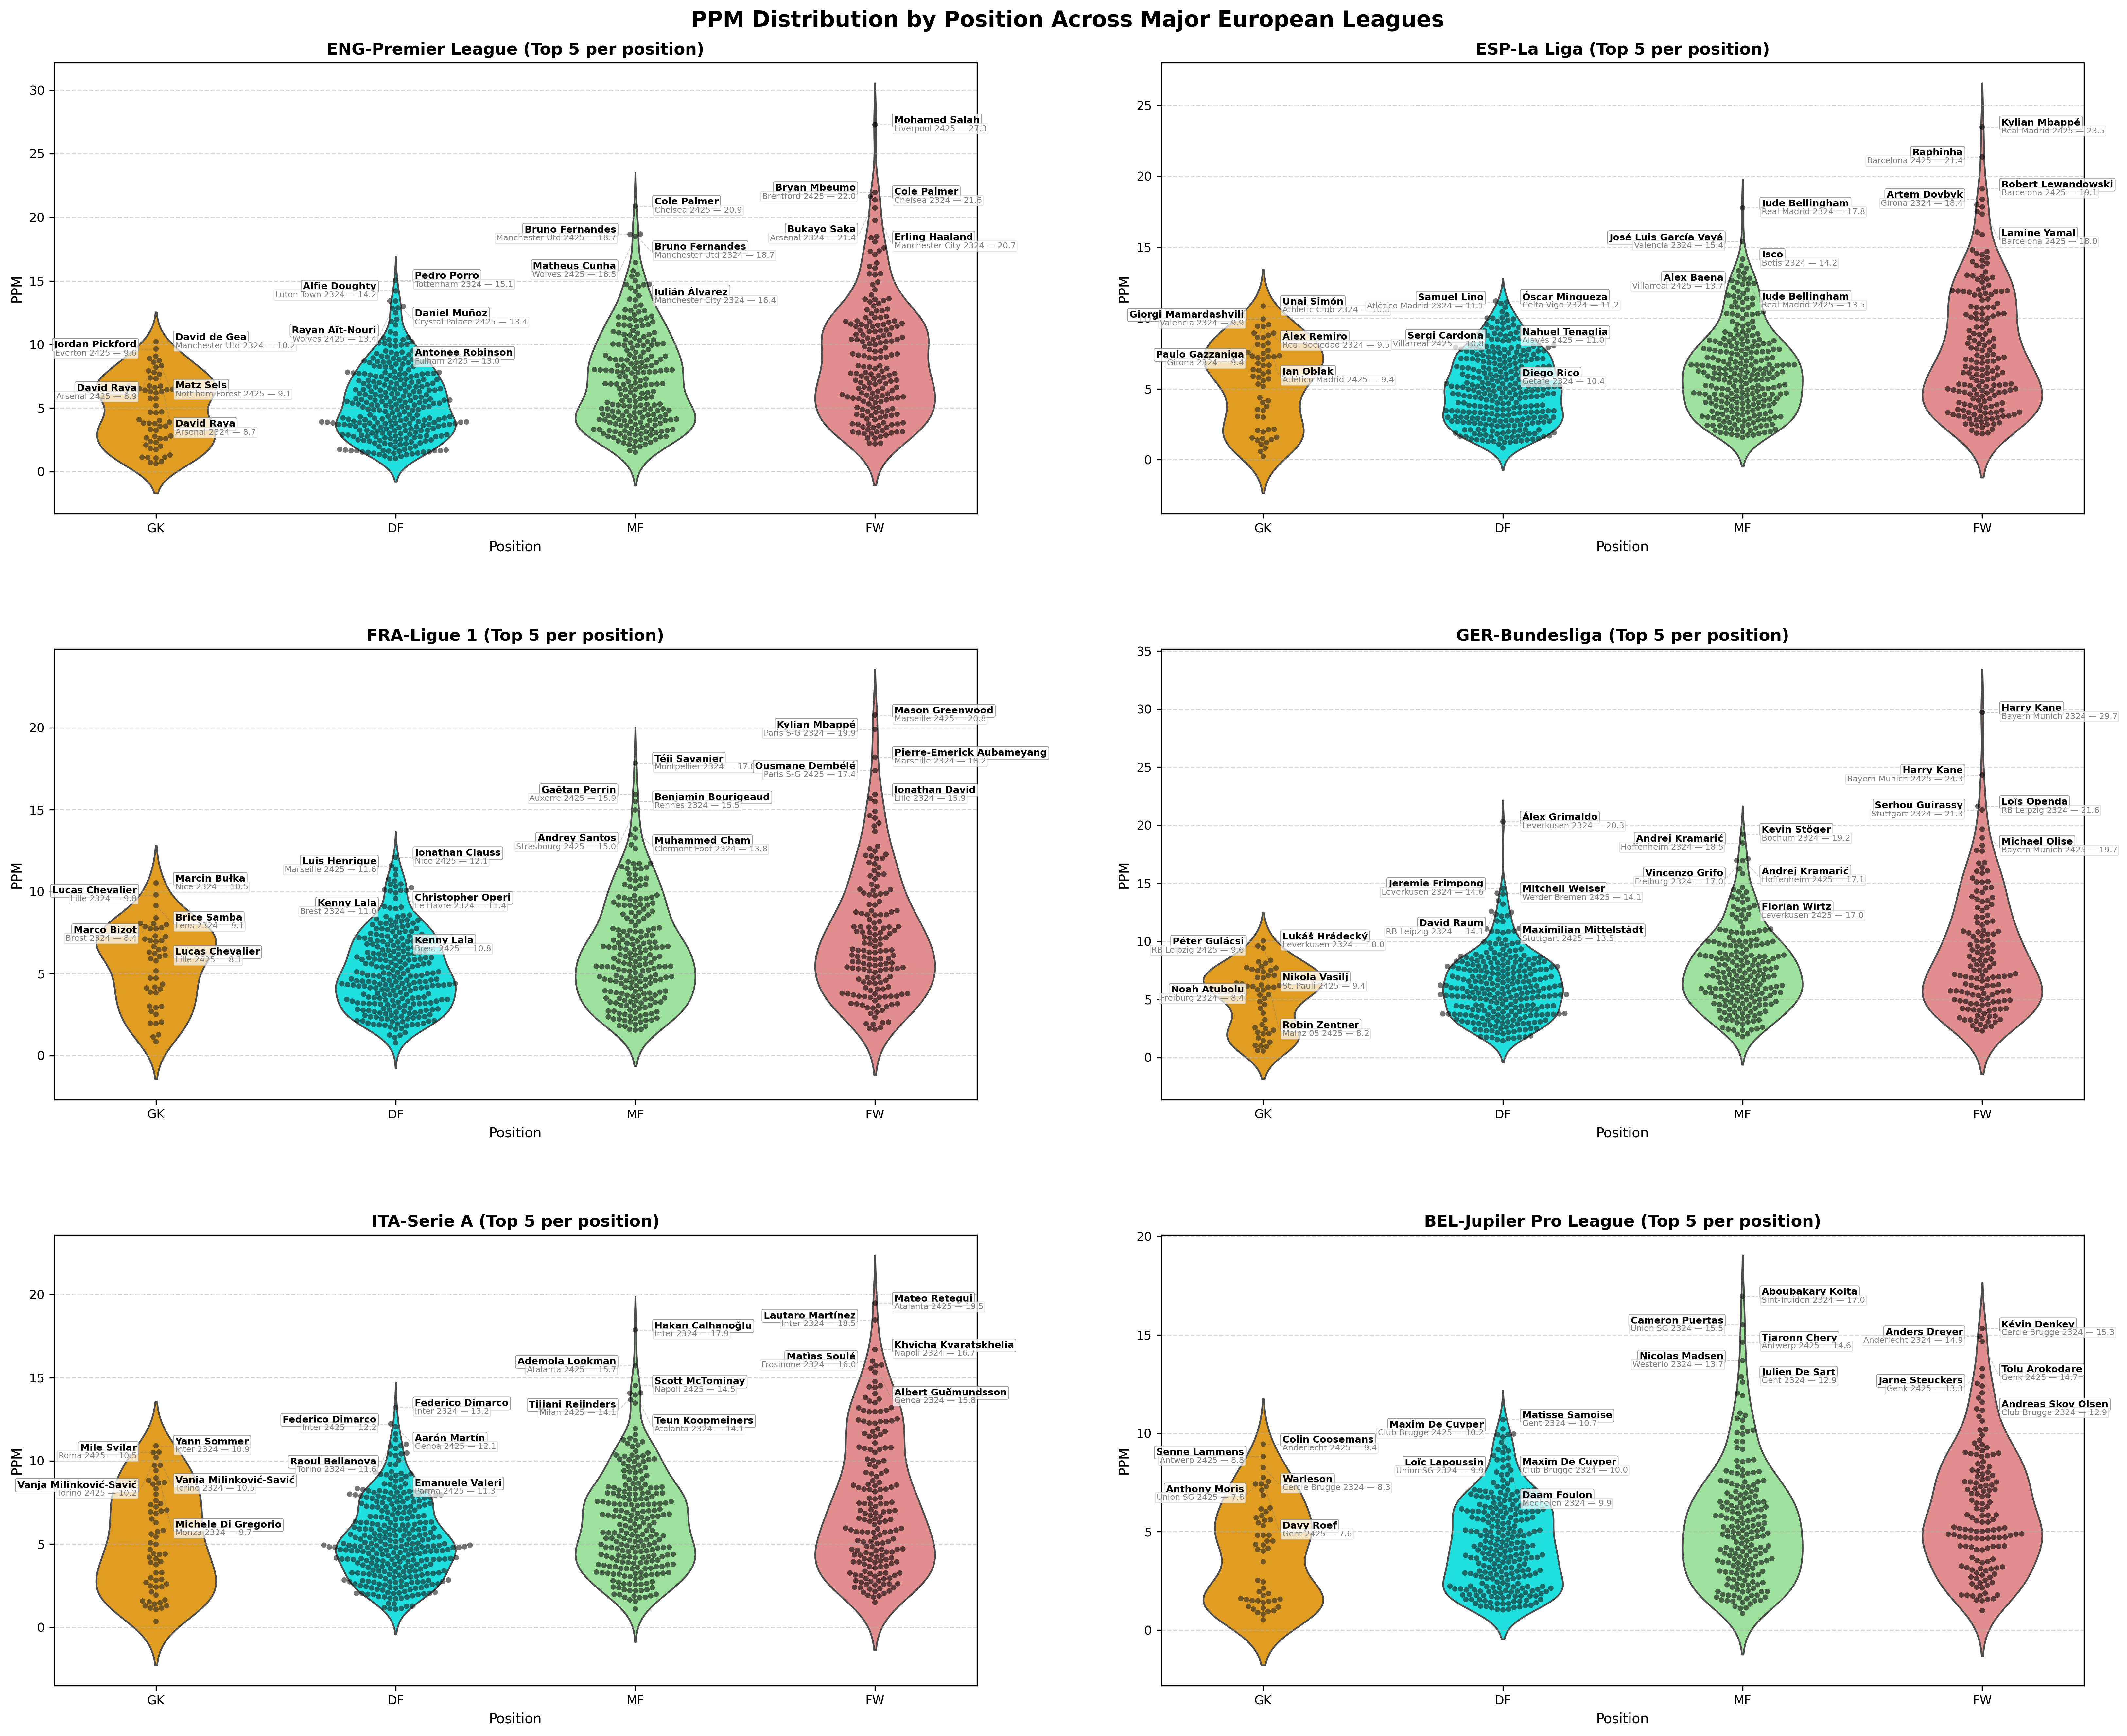

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_points_distribution_grid(leagues, threshold=5, top_k=5):
    """
    Plot the points distribution by position for multiple leagues in a 3x2 grid.

    Parameters:
    leagues (list): List of league names (e.g., ["ENG-Premier League", "ESP-La Liga", ...]).
    threshold (int): Minimum number of 90s played to include a player in the plot
    top_k (int): Number of top players to annotate per position
    """
    # Create figure with subplots in 3x2 grid
    fig, axes = plt.subplots(3, 2, figsize=(22, 18), dpi=300)
    axes = axes.flatten()  # Flatten to make indexing easier
    
    # order and colors
    position_order = ['GK', 'DF', 'MF', 'FW']
    color_map = {'GK': 'orange', 'DF': 'cyan', 'MF': 'lightgreen', 'FW': 'lightcoral'}
    
    for league_idx, league in enumerate(leagues):
        ax = axes[league_idx]
        
        stats = basic_player_stats.loc[(league)]
        filtered = stats[stats[('Playing Time', '90s')] > threshold].copy()

        # ensure categorical ordering
        filtered['first_pos'] = pd.Categorical(filtered['first_pos'], categories=position_order, ordered=True)

        # Create violin plot
        sns.violinplot(
            x='first_pos',
            y='PPM',
            hue='first_pos',        
            data=filtered,
            order=position_order,
            palette=color_map,
            dodge=False,
            width=0.5,
            legend=False,
            inner=None,
            ax=ax
        )

        sns.swarmplot(
            x='first_pos',
            y='PPM',
            hue='first_pos',
            data=filtered,
            order=position_order,
            palette='dark:black',
            size=4,  # Slightly smaller for subplot
            alpha=0.6,
            legend=False,
            ax=ax
        )

        # remove the redundant legend created by hue
        if ax.get_legend() is not None:
            ax.legend_.remove()

        # compute offsets for annotations based on y-range
        y_min = filtered['PPM'].min()
        y_max = filtered['PPM'].max()
        y_range = (y_max - y_min) if (y_max > y_min) else max(abs(y_max), 1.0)
        
        # Improved annotation settings (smaller for subplots)
        horiz_offset = 0.08
        base_line_spacing = y_range * 0.025
        min_vertical_gap = y_range * 0.1
        
        # Dictionary to track ALL annotation positions for each side of each position
        annotation_positions = {pos: {'left': [], 'right': []} for pos in position_order}
        
        def find_non_overlapping_position(target_y, side_positions, side):
            """
            Find a y position that doesn't overlap with existing annotations.
            """
            if not side_positions:
                return target_y
            
            # Sort existing positions
            sorted_positions = sorted(side_positions)
            
            # Try the original position first
            if not any(abs(target_y - pos) < min_vertical_gap for pos in sorted_positions):
                return target_y
            
            # Move downward to find non-overlapping position
            test_y = target_y
            while any(abs(test_y - pos) < min_vertical_gap for pos in sorted_positions):
                test_y -= min_vertical_gap * 0.5
            
            return test_y
        
        # find top k players per position and annotate them
        for pos_idx, pos in enumerate(position_order):
            pos_df = filtered[filtered['first_pos'] == pos]
            if pos_df.empty:
                continue
                
            # Get top k players by PPM for this position
            top_players = pos_df.nlargest(top_k, 'PPM')
            
            # Sort by PPM descending for consistent annotation order
            top_players = top_players.sort_values('PPM', ascending=False)
            
            for player_idx, (idx, row) in enumerate(top_players.iterrows()):
                # robustly extract team and player from the index
                if isinstance(idx, tuple) and len(idx) >= 2:
                    season, team_val, player_val = idx[0], idx[1], idx[2]
                else:
                    player_val = idx
                    team_val = row.get(('team',)) if ('team',) in row.index else ''

                # normalize team and player to strings
                try:
                    team_str = team_val if isinstance(team_val, str) else str(team_val)
                    player_str = player_val if isinstance(player_val, str) else str(player_val)
                    season_str = season if isinstance(season, str) else str(season)
                except Exception:
                    team_str = str(team_val)
                    player_str = str(player_val)
                    season_str = str(season)

                x = pos_idx
                
                # ensure y is a float scalar
                y_raw = row['PPM']
                try:
                    y = float(y_raw.iloc[0]) if hasattr(y_raw, 'iloc') else float(y_raw)
                except Exception:
                    y = float(y_raw)

                # Determine which side to place the annotation
                side = 'right' if player_idx % 2 == 0 else 'left'
                
                # Calculate annotation position
                if side == 'right':
                    x_text = x + horiz_offset
                    ha = 'left'
                else:
                    x_text = x - horiz_offset
                    ha = 'right'
                
                # Find non-overlapping y position
                y_text = find_non_overlapping_position(y, annotation_positions[pos][side], side)
                
                # Store this annotation position
                annotation_positions[pos][side].append(y_text)

                # Create two-line annotation with background boxes (smaller fonts for subplots)
                # Player name (bold) on first line
                ax.text(x_text, y_text + base_line_spacing/2, str(player_str), 
                       ha=ha, va='center', fontsize=7, fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8, edgecolor='gray', linewidth=0.5))
                
                # Team and PPM on second line
                team_points = f"{team_str} {season_str} — {y:.1f}"
                ax.text(x_text, y_text - base_line_spacing/2, team_points, 
                       ha=ha, va='center', fontsize=6, color='gray',
                       bbox=dict(boxstyle="round,pad=0.15", facecolor='white', alpha=0.7, edgecolor='lightgray', linewidth=0.5))
                
                # Draw a subtle line connecting annotation to actual data point
                ax.plot([x, x_text - (0.015 if side == 'right' else -0.015)], [y, y_text], 
                       color='gray', linestyle='--', alpha=0.4, linewidth=0.6)

        # Set subplot title and labels
        ax.set_title(f'{league} (Top {top_k} per position)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Position', fontsize=10)
        ax.set_ylabel('PPM', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Set main title for the entire figure
    fig.suptitle('PPM Distribution by Position Across Major European Leagues', fontsize=16, fontweight='bold', y=0.98)
    
    # Adjust layout to prevent cutoff and overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.2)
    plt.show()

# Call the function with your leagues
leagues = ["ENG-Premier League", "ESP-La Liga", "FRA-Ligue 1", "GER-Bundesliga", "ITA-Serie A", "BEL-Jupiler Pro League"]
plot_points_distribution_grid(leagues, threshold=5, top_k=5)

In [19]:
# analyze missing players across all leagues
league_missing_stats = {}

prev_season = basic_player_stats.xs("2324", level="season")

# column labels for nation and age (columns are MultiIndex with empty second level)
nation_col = ('nation', '')
# age_col = ('age', '')

for league in league_list:
    try:
        # get current season players for this league
        current_season = basic_player_stats.xs((league, "2425"), level=("league", "season"))
        # Let's put a filter on players with at least 10 90s played
        # current_season = current_season[current_season[('Playing Time', '90s')] >= 10]

        missing = []
        found = []
        
        for (team, player), row in current_season.iterrows():
            curr_90 = row[("Playing Time", "90s")]
            curr_season_points = row["Seasonal Points"]
            
            # find any rows in prev season with same player name
            candidates = prev_season[prev_season.index.get_level_values("player") == player]
            if candidates.empty:
                missing.append((player, team, curr_90))
            else:
                # filter candidates by matching nation AND age
                prev_rows = candidates[
                    (candidates[nation_col] == row.get(nation_col))
                    # (candidates[age_col] == row.get(age_col)-1)
                ]
                if prev_rows.empty:
                    missing.append((player, team, curr_90))
                else:
                    # record all previous entries that match
                    for prev_idx, prev_row in prev_rows.iterrows():
                        prev_league, prev_team, _ = prev_idx
                        prev_90 = prev_row.get(("Playing Time", "90s"), None)
                        prev_season_points = prev_row["Seasonal Points"]
                        found.append((player, team, curr_90, curr_season_points, prev_league, prev_team, prev_90, prev_season_points))
        
        total_players = len(current_season)
        missing_count = len(missing)
        found_count = len(found)
        missing_percentage = (missing_count / total_players) * 100 if total_players > 0 else 0
        
        league_missing_stats[league] = {
            'total_players': total_players,
            'missing_players': missing_count,
            'found_players': found_count,
            'missing_percentage': missing_percentage,
            'missing_list': missing
        }
        
    except KeyError:
        # league doesn't have 2425 season data
        league_missing_stats[league] = {
            'total_players': 0,
            'missing_players': 0,
            'found_players': 0,
            'missing_percentage': 0,
            'missing_list': []
        }

# create summary dataframe
summary_data = []
for league, stats in league_missing_stats.items():
    summary_data.append({
        'League': league,
        'Total Players': stats['total_players'],
        'Missing Players': stats['missing_players'],
        'Found Players': stats['found_players'],
        'Missing %': round(stats['missing_percentage'], 1)
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Missing %')

print("League Missing Players Analysis:")
print("=" * 50)
print(summary_df.to_string(index=False))

print(f"\nLeague with least missing players: {summary_df.iloc[0]['League']} ({summary_df.iloc[0]['Missing %']}%)")
print(f"League with most missing players: {summary_df.iloc[-1]['League']} ({summary_df.iloc[-1]['Missing %']}%)")

League Missing Players Analysis:
                   League  Total Players  Missing Players  Found Players  Missing %
       ENG-Premier League            493               40            453        8.1
              ITA-Serie A            533               63            470       11.8
           GER-Bundesliga            441               58            383       13.2
         ENG-Championship            668              101            567       15.1
              ESP-La Liga            546               83            463       15.2
              FRA-Ligue 1            482               90            392       18.7
  USA-Major League Soccer            779              156            623       20.0
   BEL-Jupiler Pro League            425               91            334       21.4
   SUI-Swiss Super League            355              103            252       29.0
          SCO-Premiership            349              106            243       30.4
           BRA-Brasilerao            612   

In [20]:
# Group all players by their team and sum their Seasonal Points
team_points = basic_player_stats.groupby(level=["league", "season", "team"]).agg({
    ('Seasonal Points', ''): 'sum',
    ('PPM', ''): ['sum', 'mean']
}).round(2)

# Add a new column with the number of matches played for each league
team_points['Matches Played'] = team_points.index.get_level_values('league').map(matches_played)
# Calculate the mean points per match for each team
team_points['Mean Points/Match'] = (team_points[('Seasonal Points', '', 'sum')] / team_points[('Matches Played', '', '')]).round(2)
# Drop the Matches Played column
team_points = team_points.drop(columns=[('Matches Played', '', '')])

Here I implemented an hard-coded rule-based algorithm to give to every player the market value, based firstly on their performance, but taking in consideration also age, position (offensive players on average makes more points per game, so has more value than a defender) and the strenght of the team.

In [21]:
import numpy as np
from scipy import stats
import pandas as pd
import warnings
from pandas.errors import PerformanceWarning

def calculate_player_price(basic_player_stats, team_points, min_games_threshold=5):
    """
    Calculate player prices based on multiple factors with improved methodology:
    - Age (younger players get premium, realistic age curve)
    - Position (based on actual PPM performance data)
    - PPM (individual performance, standardized within league)
    - Team strength (based on league ranking)
    - Positional ranking within team (best at position gets premium)
    
    Price range: 4-25, calculated independently for each league
    """
    
    # Create a copy to avoid modifying original data
    df = basic_player_stats.copy()
    
    # Initialize price column
    df['Market_Price'] = 4.0  # Base price for insufficient data
    
    # Process each league separately for independent pricing
    for league in df.index.get_level_values('league').unique():
        league_data = df.xs(league, level='league')
        
        # Filter players with sufficient playing time
        sufficient_data = league_data[league_data[('Playing Time', '90s')] > min_games_threshold]
        
        if len(sufficient_data) == 0:
            print(f"No players with sufficient data in {league}, skipping price calculation.")
            continue
        
        # Get team rankings based on Mean Points/Match
        try:
            league_team_points = team_points.xs(league, level='league')
            latest_season = league_team_points.index.get_level_values('season').max()
            team_strength = league_team_points.xs(latest_season, level='season')['Mean Points/Match']
            
            # Create team ranking (1 = best team, higher number = worse team)
            team_ranking = team_strength.rank(method='dense', ascending=False)
            num_teams = len(team_ranking)
        except KeyError:
            print(f"No team points data for {league}, using neutral team ranking.")
            unique_teams = sufficient_data.index.get_level_values('team').unique()
            team_ranking = pd.Series(index=unique_teams, data=len(unique_teams)/2)
            num_teams = len(unique_teams)
        
        # Calculate factors for each player
        for idx, player_row in sufficient_data.iterrows():
            season, team, player = idx
            
            # 1. Age factor with realistic football career curve
            age = player_row[('age', '')]
            position = player_row.get(('first_pos', ''), 'MF')
            
            if pd.isna(age) or age < 16 or age > 45:
                age_factor = 0.7  # Penalty for unknown age
            else:
                # Different age curves for goalkeepers vs outfield players
                if position == 'GK':
                    # Goalkeepers have longer careers and peak later
                    if age < 20:
                        age_factor = 0.6 + (age - 16) * 0.08  # Slower development
                    elif age <= 26:
                        age_factor = 0.92 + (26 - age) * 0.03  # Gradual rise to peak
                    elif age <= 32:
                        age_factor = 1.1  # Extended peak years
                    elif age <= 37:
                        age_factor = 1.1 - (age - 32) * 0.02  # Very gradual decline
                    else:
                        age_factor = max(0.6, 1.0 - (age - 37) * 0.05)  # Slower decline
                else:
                    # Original curve for outfield players
                    if age < 20:
                        age_factor = 0.6 + (age - 16) * 0.1  # Young prospect
                    elif age <= 24:
                        age_factor = 1.0 + (24 - age) * 0.03  # Rising talent
                    elif age <= 28:
                        age_factor = 1.1  # Peak years
                    elif age <= 32:
                        age_factor = 1.1 - (age - 28) * 0.05  # Gradual decline
                    else:
                        age_factor = max(0.4, 0.9 - (age - 32) * 0.08)  # Steep decline
            
            # 2. Position factor based on actual performance data
            # Normalize to midfielder baseline (most common position)
            position_multipliers = {
            'GK': 8.10 / 10.72,   # 0.756 (goalkeepers score less)
            'DF': 9.10 / 10.72,   # 0.849 (defenders score moderately)
            'MF': 1.0,            # 1.000 (baseline)
            'FW': 13.81 / 10.72   # 1.288 (forwards score most)
            }
            position_factor = position_multipliers.get(position, 1.0)

            # 3. Individual performance (PPM) - standardized within league and position
            player_ppm = player_row['PPM']
            if isinstance(player_ppm, pd.Series):
                player_ppm = player_ppm.iloc[0] if len(player_ppm) > 0 else np.nan
            
            if pd.isna(player_ppm):
                performance_score = 0.2  # Low score for missing data
            else:
                # Filter sufficient_data by position within the league
                position_data = sufficient_data[sufficient_data[('first_pos', '')] == position]
                
                if len(position_data) > 1:
                    # Z-score normalization within league and position (mean=0, std=1)
                    position_ppm_mean = position_data['PPM'].mean()
                    position_ppm_std = position_data['PPM'].std()
                    
                    if position_ppm_std > 0:
                        z_score = (player_ppm - position_ppm_mean) / position_ppm_std
                        # Convert z-score to 0-1 scale (99.7% of data within ±3 std)
                        performance_score = max(0, min(1, (z_score + 3) / 6))
                    else:
                        performance_score = 0.5  # Neutral if no variation
                else:
                    performance_score = 0.5  # Neutral if only one player in position
            
            # 4. Team strength factor based on ranking
            try:
                team_rank = team_ranking[team]
                # Convert rank to factor: top teams get 1.0, bottom teams get 0.3
                team_factor = max(0.3, 1.0 - (team_rank - 1) / (num_teams - 1) * 0.7)
            except (KeyError, TypeError):
                team_factor = 0.65  # Neutral for missing data
            
            # 5. Positional ranking within team
            # Get all teammates in same position with sufficient data
            position_teammates = sufficient_data[
                (sufficient_data.index.get_level_values('season') == season) &
                (sufficient_data.index.get_level_values('team') == team) &
                (sufficient_data[('first_pos', '')] == position)
            ]
            
            if len(position_teammates) > 1:
                # Rank players by 90s within position at team (1 = best)
                position_ranking = position_teammates[('Playing Time', '90s')].rank(method='dense', ascending=False)
                # Use the full index tuple to access the ranking
                player_position_rank = position_ranking.loc[(season, team, player)]
                num_at_position = len(position_teammates)
                
                # Convert to factor: best gets 1.0, others get progressively less
                if num_at_position == 1:
                    positional_factor = 1.0
                else:
                    positional_factor = max(0.5, 1.0 - (player_position_rank - 1) / (num_at_position - 1) * 0.5)
            else:
                positional_factor = 1.0  # Only player in position
            
            # Combine all factors with weights based on importance
            final_score = (
                performance_score * 0.60 +      # 60% individual performance (most important)
                team_factor * 0.20 +            # 20% team strength
                positional_factor * 0.20        # 20% position within team
            ) * age_factor * position_factor
            

            # Convert to price scale (4-25) with natural distribution
            # Use logistic curve to create realistic price distribution
            price = 4 + 21 * (1 / (1 + np.exp( - 5 * (final_score - 0.55))))

            # Ensure price is within bounds and round
            price = max(4.0, min(25.0, round(price, 1)))
            
            # Update the main dataframe
            full_idx = (league, season, team, player)
            df.loc[full_idx, 'Market_Price'] = price

            df.loc[full_idx, 'Final_Score'] = round(final_score, 3)


    return df

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=PerformanceWarning)
    basic_player_stats = calculate_player_price(basic_player_stats, team_points, min_games_threshold=5)

### Final Dataset

From here we will build the dataset, the selection of players of the season 24/25 to create our fantasy football league. We will take their ppm and evolve based on the transfers happened between the two seasons and the promotion/relegation of teams that we need to take in consideration.  
We will build 6 different datasets, one from each of the following leagues:
* 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Premier League
* 🇫🇷 Ligue 1
* 🇩🇪 Bundesliga
* 🇪🇸 La Liga
* 🇮🇹 Serie A
* 🇧🇪 Jupiler Pro League

Since those are the only leagues we have enough information to know what happened also in their second divisions (for the players from the promoted teams, usually 2 or 3, depending on the region)

In [22]:
import pandas as pd
import numpy as np

# Define the leagues
leagues = [
    'ENG-Premier League',
    'ESP-La Liga',
    'FRA-Ligue 1',
    'GER-Bundesliga',
    'BEL-Jupiler Pro League',
    'ITA-Serie A',
]

# Function to get team strength (Mean Points/Match) for a given league and season
def get_team_strength(league, season):
    try:
        league_team_points = team_points.xs(league, level='league')
        season_team_points = league_team_points.xs(season, level='season')
        return season_team_points[('Mean Points/Match', '', '')]
    except KeyError:
        print(f"No team points data for {league} in season {season}.")
        return pd.Series(dtype=float)  # Empty if no data

# Function to adjust PPM and price based on team/league changes
def adjust_ppm_price(player_row, league, season='2425', prev_season='2324'):
    player = player_row.name[1]  # Index is (team, player)
    team = player_row.name[0]
    position = player_row[('first_pos', '')]
    
    # Get previous season data for this player
    try:
        prev_data = basic_player_stats.xs((prev_season, player), level=('season', 'player'))
        # Filter to the league they were in last season (might be different)
        if not prev_data.empty:
            prev_league = prev_data.index.get_level_values('league')[0]
            prev_team = prev_data.index.get_level_values('team')[0]
            prev_ppm = prev_data['PPM'].iloc[0]
            prev_price = prev_data['Market_Price'].iloc[0]
        else:
            return None, None  # No previous data, signal to exclude this player
    except KeyError:
        return None, None  # No previous data, signal to exclude this player
    
    # Initialize adjusted values with previous
    adjusted_ppm = prev_ppm
    adjusted_price = prev_price
    
    # Only adjust based on team/league change
    if prev_team != team or (prev_league != league and prev_team != team):
        # Get team strengths
        new_team_strength = get_team_strength(league, season).get(team, np.nan)
        old_team_strength = get_team_strength(prev_league, prev_season).get(prev_team, np.nan)
        
        # If team strengths are available, adjust
        if not pd.isna(new_team_strength) and not pd.isna(old_team_strength):
            strength_diff = new_team_strength - old_team_strength
            
            # Adjustment factor based on strength difference
            adjustment_factor = 1 + (strength_diff / 10) * 0.1  # Small adjustment, e.g., 10% per unit difference
            adjustment_factor = max(0.5, min(1.5, adjustment_factor))  # Cap the factor

            adjusted_ppm = prev_ppm * adjustment_factor
            adjusted_price = prev_price * adjustment_factor

            adjusted_price = max(4.0, min(25.0, adjusted_price))  # Keep within bounds
            print(f"Adjusted {player} from {prev_team} ({prev_league}) to {team} ({league}): PPM {prev_ppm:.2f} -> {adjusted_ppm:.2f}, Price {prev_price:.1f} -> {adjusted_price:.1f}")
        else:
            # If no team strength data, keep previous values
            adjusted_ppm = prev_ppm
            adjusted_price = prev_price

    # If the player changes league but stays in the same team (e.g., promoted teams), we have to reduce price and ppm always
    elif prev_league != league and prev_team == team:
        adjusted_ppm *= 0.80  # Reduce PPM by 20%
        adjusted_price *= 0.80  # Reduce Price by 20%
        adjusted_price = max(4.0, min(25.0, adjusted_price))  # Keep within bounds
        print(f"Adjusted {player} in same team {team} but new league {league}: PPM {prev_ppm:.2f} -> {adjusted_ppm:.2f}, Price {prev_price:.1f} -> {adjusted_price:.1f}")

    # Additional adjustment: Compare with teammates of the same position (always do this for new team)
    try:
        team_players = basic_player_stats.xs((league, season, team), level=('league', 'season', 'team'))
        position_players = team_players[team_players[('first_pos', '')] == position]
        if not position_players.empty:
            team_avg_ppm = position_players['PPM'].mean()
            # If player is significantly better than teammates, boost PPM slightly
            if adjusted_ppm > team_avg_ppm:
                adjusted_ppm *= 1.05  # Boost by 5% for being standout
                adjusted_price *= 1.05  # Slight increase for being standout
            elif adjusted_ppm < team_avg_ppm:
                adjusted_ppm *= 0.95  # Reduce by 5% for being below average
                adjusted_price *= 0.95  # Slight decrease for being below average
            adjusted_price = max(4.0, min(25.0, adjusted_price))  # Keep within bounds
            print(f"Adjusted {player} in {team} ({league}): PPM {adjusted_ppm:.2f}, Price {adjusted_price:.1f} based on position peers")
    except KeyError:
        pass  # No adjustment if data not available

    return round(adjusted_ppm, 3), round(adjusted_price, 1)

In [23]:
# Dictionary to hold the datasets
fantasy_datasets = {}

second_divisions_leagues = {
        'ENG-Premier League': 'ENG-Championship',
        'ESP-La Liga': 'ESP-Segunda Division',
        'FRA-Ligue 1': 'FRA-Ligue 2',
        'GER-Bundesliga': 'GER-2. Bundesliga',
        'ITA-Serie A': 'ITA-Serie B',
        'BEL-Jupiler Pro League': 'BEL-Challenger Pro League'
    }

for league in leagues:
    # Filter players for this league and season 2425
    league_players = basic_player_stats.xs((league, '2425'), level=('league', 'season'))
    
    # Filter players with at least 5 90s played
    league_players = league_players[league_players[('Playing Time', '90s')] >= 5]

    # Calculate standard deviation of PPM for each position
    std_dev_ppm = league_players.groupby(league_players[('first_pos', '')])['PPM'].std().to_dict()

    promoted_strength_override = {}

    second_div = second_divisions_leagues.get(league, None)
    if not second_div:
        continue

    prev_top_strength = get_team_strength(league, '2324')   # Series indexed by team
    curr_top_strength = get_team_strength(league, '2425')   # Series indexed by team

    # need both season team lists
    if prev_top_strength.empty or curr_top_strength.empty:
        print(f"Skipping {league}: missing prev or curr top-tier strength data.")
        continue

    prev_teams = set(prev_top_strength.index)
    curr_teams = set(curr_top_strength.index)

    # relegated: were in prev top but not in curr top
    relegated_teams = list(prev_teams - curr_teams)

    # promoted: new in current top (could come from second division)
    promoted_teams = list(curr_teams - prev_teams)

    if len(relegated_teams) == 0 or len(promoted_teams) == 0:
        print(f"No promotion/relegation detected for {league}.")
        continue

    # Order relegated teams so tail(3) gives [third-from-last, second-from-last, last]
    prev_rank_desc = prev_top_strength.sort_values(ascending=False) 
    relegated_bottom_ordered = [t for t in prev_rank_desc.index if t in relegated_teams][-3:]

    # Order promoted teams by their second division rank (best first)
    second_div_strength = get_team_strength(second_div, '2324')
    if second_div_strength.empty:
        # fallback: use natural order of promoted_teams
        promoted_ordered = promoted_teams[:3]
    else:
        promoted_ordered = [t for t in second_div_strength.sort_values(ascending=False).index if t in promoted_teams][:3]

    # Ensure we have up to 3 items for mapping (pad/truncate)
    # If not enough relegated/promoted found in the exact sets, fallback to available lists
    if len(relegated_bottom_ordered) < 3:
        # try to fill from relegated_teams ordered by prev strength (worst first)
        fallback = [t for t in prev_rank_desc.index if t in relegated_teams]
        relegated_bottom_ordered = (relegated_bottom_ordered + fallback)[0:3]

    if len(promoted_ordered) < 3:
        promoted_ordered = (promoted_ordered + promoted_teams)[0:3]

    # Build mapping: promoted[i] takes strength of relegated_bottom_ordered[i]
    league_map = {}
    for i, prom_team in enumerate(promoted_ordered):
        try:
            rel_team = relegated_bottom_ordered[i]
            rel_strength = float(prev_top_strength.loc[rel_team])
        except Exception:
            rel_strength = np.nan
        league_map[prom_team] = rel_strength

    promoted_strength_override[league] = league_map

    # print summary for quick verification
    print(f"\n{league}")
    print("Relegated (mapped order: 3rd-from-last, 2nd-from-last, last):", relegated_bottom_ordered)
    print("Promoted (1st,2nd,3rd from 2nd division):", promoted_ordered)
    print("Mapping (promoted -> strength of relegated):")
    for p, s in league_map.items():
        print(f"  {p} -> {s}")

    # Create the dataset
    dataset = []
    for idx, row in league_players.iterrows():
        team = idx[0]  # First level is team
        player = idx[1]  # Second level is player
        position = row[('first_pos', '')]
        
        # Adjust PPM and price
        adjusted_ppm, adjusted_price = adjust_ppm_price(row, league)

        # Find the player's team strength override if promoted
        if team in promoted_strength_override.get(league, {}):
            override_strength = promoted_strength_override[league][team]
            if not pd.isna(override_strength):
                # Override the team strength factor in the adjustment
                print(f"Overriding team strength for promoted team {team} in {league} to {override_strength:.2f}")
                # This is already factored into adjust_ppm_price, so no action needed here
            else: # Take the team strength of the past season
                override_strength = curr_top_strength.get(team, np.nan)

        # Skip players without previous season data
        if adjusted_ppm is None or adjusted_price is None:
            continue
        
        # Get std_dev_PPM
        std_dev = std_dev_ppm.get(position, 3.0)  # Default if position not found
        
        # Append to dataset
        dataset.append({
            'player': player,
            'team': team,
            'team_strength': round(override_strength if team in promoted_strength_override.get(league, {}) else curr_top_strength.get(team, np.nan), 2),
            'team_std_dev': round(prev_top_strength.std() if not curr_top_strength.empty else np.nan, 2),
            'position_role': position,
            'price': adjusted_price,
            'PPM': adjusted_ppm,
            'std_dev_PPM': round(std_dev, 3),
            'final_PPM': round(row[('PPM', '')], 3),
            'final_seasonal_points': round(row[('Seasonal Points', '')], 1)
        })
    
    # Convert to DataFrame and store
    fantasy_datasets[league] = pd.DataFrame(dataset)


ENG-Premier League
Relegated (mapped order: 3rd-from-last, 2nd-from-last, last): ['Luton Town', 'Burnley', 'Sheffield Utd']
Promoted (1st,2nd,3rd from 2nd division): ['Leicester City', 'Southampton', 'Ipswich Town']
Mapping (promoted -> strength of relegated):
  Leicester City -> 128.93
  Southampton -> 119.78
  Ipswich Town -> 108.51
Adjusted Ben White in Arsenal (ENG-Premier League): PPM 10.50, Price 20.6 based on position peers
Adjusted Bukayo Saka in Arsenal (ENG-Premier League): PPM 22.44, Price 25.0 based on position peers
Adjusted David Raya in Arsenal (ENG-Premier League): PPM 8.30, Price 17.5 based on position peers
Adjusted Declan Rice in Arsenal (ENG-Premier League): PPM 15.76, Price 22.9 based on position peers
Adjusted Ethan Nwaneri in Arsenal (ENG-Premier League): PPM 0.04, Price 4.0 based on position peers
Adjusted Gabriel Jesus in Arsenal (ENG-Premier League): PPM 8.05, Price 22.2 based on position peers
Adjusted Gabriel Magalhães in Arsenal (ENG-Premier League): PPM 9

As we can see, for further analysis, we are not saving just the PPM that the algorithm will use for the optimization problem, but also the the Final PPM, so the mean of points the player will get during the season of evaluation, and Seasonl Points.  
Even if we added also the standard deviation of the PPM to every player (based on the performances of the players in each role), we can see that that there are a selection of players not trascurable (in the italian first division around the $10\%$ of the players) that has a difference between the PPM we calculated as their expected performance and the actual final value higher than the $2$ standard deviation.  
This because the nature of the problem is implicitly stochastic, since as a the football fans says "the ball is round" and everything can happen!

In [17]:
# I want to analyze for every player in the "ITA-Serie A" dataset, what was their PPM and final PPM
# And see if the difference is significant respect to their std_dev_PPM
offset_df = fantasy_datasets['ITA-Serie A'].copy()
# Calculate the difference and how many std_devs it represents
offset_df['PPM_Diff'] = offset_df['PPM'] - offset_df['final_PPM']
offset_df['Diff_in_StdDevs'] = offset_df['PPM_Diff'] / offset_df['std_dev_PPM']
# Identify players with significant differences (e.g., more than 2 std_dev)
significant_diffs = offset_df[offset_df['Diff_in_StdDevs'].abs() > 2]
print("Players in ITA-Serie A with significant PPM differences:")
significant_diffs

Players in ITA-Serie A with significant PPM differences:


player        team  team_strength  team_std_dev  \
6            Lazar Samardzic    Atalanta         151.51         14.58   
15           Raoul Bellanova    Atalanta         151.51         14.58   
21           Davide Calabria     Bologna         136.74         14.58   
25              Jens Odgaard     Bologna         136.74         14.58   
28            Lewis Ferguson     Bologna         136.74         14.58   
31          Nicolò Cambiaghi     Bologna         136.74         14.58   
38              Stefan Posch     Bologna         136.74         14.58   
39            Thijs Dallinga     Bologna         136.74         14.58   
50             Mattia Felici    Cagliari         120.11         14.58   
51        Michel Ndary Adopo    Cagliari         120.11         14.58   
52              Nadir Zortea    Cagliari         120.11         14.58   
67         Gabriel Strefezza        Como         108.57         14.58   
73          Maxence Caqueret        Como         108.57         14.58   
75               Nicolás Paz        Como         108.57         14.58   
86         Giuseppe Pezzella      Empoli         115.09         14.58   
96        Albert Guðmundsson  Fiorentina         127.83         14.58   
98            Andrea Colpani  Fiorentina         127.83         14.58   
102                     Dodô  Fiorentina         127.83         14.58   
108       Michael Folorunsho  Fiorentina         127.83         14.58   
109               Moise Kean  Fiorentina         127.83         14.58   
111           Pietro Comuzzo  Fiorentina         127.83         14.58   
116             Aarón Martín       Genoa         115.49         14.58   
130             Nicola Leali       Genoa         115.49         14.58   
159         Hakan Çalhanoğlu       Inter         152.20         14.58   
162           Josep Martinez       Inter         152.20         14.58   
175             Douglas Luiz    Juventus         133.29         14.58   
179           Gleison Bremer    Juventus         133.29         14.58   
181             Kenan Yıldız    Juventus         133.29         14.58   
198      Fisayo Dele-Bashiru       Lazio         131.55         14.58   
209             Nuno Tavares       Lazio         131.55         14.58   
245       Ruben Loftus-Cheek       Milan         131.21         14.58   
261         Gianluca Caprari       Monza         109.53         14.58   
267           Matteo Pessina       Monza         109.53         14.58   
286    Khvicha Kvaratskhelia      Napoli         139.71         14.58   
292          Scott McTominay      Napoli         139.71         14.58   
302          Emanuele Valeri       Parma         125.36         14.58   
316                 Angeliño        Roma         136.91         14.58   
325             Matìas Soulé        Roma         136.91         14.58   
326              Mile Svilar        Roma         136.91         14.58   
341             Duván Zapata      Torino         118.11         14.58   
384  Hans Nicolussi Caviglia     Venezia         125.54         14.58   

    position_role  price     PPM  std_dev_PPM  final_PPM  \
6              MF   25.0  15.606        2.970      5.487   
15             DF   25.0  15.923        2.591      9.342   
21             DF   17.3   7.084        2.591      1.842   
25             MF    4.0   2.440        2.970      8.658   
28             MF   20.9  10.569        2.970      3.250   
31             FW   25.0  14.155        3.881      4.066   
38             DF   18.3   8.138        2.591      2.237   
39             FW   25.0  16.387        3.881      4.842   
50             MF   19.8  11.047        2.970      3.526   
51             MF    4.0   0.565        2.970      6.763   
52             DF   11.3   4.539        2.591     10.895   
67             FW   15.2   4.580        3.881     12.947   
73             MF   24.9  13.458        2.970      4.789   
75             MF   16.3   3.097        2.970     13.474   
86             DF   10.5   3.112        2.591      8.61

## Mathematical Formulation

The Fantasy Football Draft problem can be elegantly formulated as a variant of the binary knapsack problem with additional constraints. This is a classic combinatorial optimization problem where we must select items (in this case, football players) to maximize value while respecting multiple constraints.

Let us define our problem formally:

### Decision Variables

For each player $i$ in our set of available players $N = \{1, 2, \ldots, n\}$, we define a binary decision variable:

$$x_i = \begin{cases}
1 & \text{if player } i \text{ is selected} \\
0 & \text{if player } i \text{ is not selected}
\end{cases}$$

### Objective Function

Our goal is to maximize the total expected Points Per Match (PPM) of the selected players:

$$\text{maximize} \sum_{i=1}^{n} \text{PPM}_i \cdot x_i$$

Note: In the implementation, this is converted to a minimization problem by negating the objective:

$$\text{minimize} -\sum_{i=1}^{n} \text{PPM}_i \cdot x_i$$

### Constraints

#### 1. Budget Constraint (Inequality)

The total cost of the selected players must not exceed the available budget $B$:

$$\sum_{i=1}^{n} \text{price}_i \cdot x_i \leq B$$

In the standard form for optimization (where constraints are expressed as $\leq 0$):

$$\sum_{i=1}^{n} \text{price}_i \cdot x_i - B \leq 0$$

#### 2. Position Constraints (Equality)

For each position $p \in \{\text{GK}, \text{DF}, \text{MF}, \text{FW}\}$, we require exactly $N_p$ players:

$$\sum_{i \in P_p} x_i = N_p \quad \forall p \in \{\text{GK}, \text{DF}, \text{MF}, \text{FW}\}$$

Where $P_p$ is the set of players with position $p$, and:
- $N_{\text{GK}}$ = number of goalkeepers required
- $N_{\text{DF}}$ = number of defenders required
- $N_{\text{MF}}$ = number of midfielders required
- $N_{\text{FW}}$ = number of forwards required

In standard form (where equality constraints are expressed as $= 0$):

$$\sum_{i \in P_{\text{GK}}} x_i - N_{\text{GK}} = 0$$
$$\sum_{i \in P_{\text{DF}}} x_i - N_{\text{DF}} = 0$$
$$\sum_{i \in P_{\text{MF}}} x_i - N_{\text{MF}} = 0$$
$$\sum_{i \in P_{\text{FW}}} x_i - N_{\text{FW}} = 0$$

#### 3. Team Diversity Constraint (Inequality)

For each team $t$ in the set of all teams $T$, we require at most $M$ players:

$$\sum_{i \in T_t} x_i \leq M \quad \forall t \in T$$

Where $T_t$ is the set of players from team $t$, and $M$ is the maximum allowed players from any single team.

In practice, this can be simplified to a single constraint:

$$\max_{t \in T} \left( \sum_{i \in T_t} x_i \right) \leq M$$


### Complete Mathematical Model

Combining all components, our complete optimization model is:

$$\begin{align*}
\text{maximize} & \sum_{i=1}^{n} \text{PPM}_i \cdot x_i \\
\text{subject to:} \\
& \sum_{i=1}^{n} \text{price}_i \cdot x_i \leq B \\
& \sum_{i \in P_{\text{GK}}} x_i = N_{\text{GK}} \\
& \sum_{i \in P_{\text{DF}}} x_i = N_{\text{DF}} \\
& \sum_{i \in P_{\text{MF}}} x_i = N_{\text{MF}} \\
& \sum_{i \in P_{\text{FW}}} x_i = N_{\text{FW}} \\
& \max_{t \in T} \left( \sum_{i \in T_t} x_i \right) \leq M \\
& x_i \in \{0, 1\} \quad \forall i \in N
\end{align*}$$

#### Stochastic Variation

The model can be extended to incorporate uncertainty in player performance. Instead of using fixed PPM values, we can sample from a distribution:

$$\text{PPM}_i \sim \mathcal{N}(\mu_i, \sigma_i^2)$$

Where $\mu_i$ is the expected PPM and $\sigma_i$ is the standard deviation.

The objective function then becomes:

$$\text{maximize } \mathbb{E}\left[\sum_{i=1}^{n} \text{PPM}_i \cdot x_i\right]$$

This stochastic objective is approximated through Monte Carlo simulation in the implementation, providing a more robust solution that accounts for performance variability.

In [ ]:
import numpy as np
from pymoo.core.callback import Callback
from pymoo.core.repair import Repair
from pymoo.core.problem import Problem

from multiprocessing.pool import ThreadPool

# Thread pool with 4 worker threads for stochastic evaluations
_THREAD_POOL = ThreadPool(4)

class FantasyTeamProblem(Problem):
    """
    Fantasy Football Team Optimization Problem using Genetic Algorithm.
    The goal is to select a team of players that maximizes expected points per match (PPM)
    while satisfying constraints on budget, team composition, and player selection.
    The evaluation can be deterministic (using PPM) or stochastic (adding noise to PPM).
    """
    def __init__(self, players_df, num_gk=2, num_df=5, num_mf=5, num_fw=3, budget=200, max_team=3, num_simulations=10):
        """
        Initialize the fantasy team optimization problem.
        Parameters:
            - players_df : DataFrame with player data including columns:
                - 'price': player price
                - 'position_role': player position ('GK', 'DF', 'MF', 'FW')
                - 'team': player team
                - 'PPM': mean points per match
                - 'std_dev_PPM': standard deviation of points per match
                - 'final_PPM': actual PPM from last season (for deterministic evaluation)
            - num_gk, num_df, num_mf, num_fw: required number of players in each position
            - budget: total budget constraint
            - max_team: maximum players allowed from a single team
            - num_simulations: number of simulations to run for stochastic evaluation (0 for deterministic)
        """
        self.players_df = players_df
        self.num_gk = num_gk
        self.num_df = num_df
        self.num_mf = num_mf
        self.num_fw = num_fw
        self.budget = budget
        self.max_team = max_team
        self.num_simulations = num_simulations
        n_vars = len(players_df)  # One binary variable per player
        
        # Initialize problem: n_vars, n_obj, n_ieq_constr, n_eq_constr
        super().__init__(
            n_var=n_vars,
            n_obj=1,           # 1 objective (maximize PPM)
            n_ieq_constr=2,    # Budget and max team constraints
            n_eq_constr=4,     # Position constraints (GK, DF, MF, FW)
            xl=0,              # Lower bound (binary: 0)
            xu=1,              # Upper bound (binary: 1)
            vtype=bool,
            elementwise_evaluation=False  # keep vectorized entry point
        )

    def _evaluate(self, X, out, *args, **kwargs):
        # X is a 2D array where each row is a solution (binary vector)
        n_solutions = X.shape[0]

        # Pre-allocate arrays for speed and consistency
        objectives = np.zeros(n_solutions)
        ieq_constraints = np.zeros((n_solutions, self.n_ieq_constr))
        eq_constraints = np.zeros((n_solutions, self.n_eq_constr))

        # Prepare arrays once per call for faster simulation
        df = self.players_df
        ppm_arr = df['PPM'].to_numpy(dtype=float)
        std_arr = df['std_dev_PPM'].fillna(0).to_numpy(dtype=float)
        price_arr = df['price'].to_numpy(dtype=float)
        pos_arr = df['position_role'].to_numpy()
        team_arr = df['team'].to_numpy()

        for i in range(n_solutions):
            selected = X[i].astype(bool)  # boolean mask
            # Deterministic: use PPM directly (no randomness)
            if int(self.num_simulations) == 0:
                total_ppm = ppm_arr[selected].sum()
            else:
                sims = int(self.num_simulations)
                # Define simulation function that uses the closure arrays.
                # It accepts a dummy integer (iteration index) because ThreadPool.map provides an iterable.
                def _sim_once(_):
                    sim_vals = np.random.normal(ppm_arr, std_arr)
                    np.clip(sim_vals, 0, None, out=sim_vals)
                    return sim_vals[selected].sum()
                # Run sims in parallel on the shared thread pool (4 threads)
                results = _THREAD_POOL.map(_sim_once, range(sims))
                total_ppm = float(np.mean(results))

            total_price = price_arr[selected].sum()

            # Position counts
            # Efficient counting using numpy
            selected_positions = pos_arr[selected]
            # fallback counts
            gk_count = int((selected_positions == 'GK').sum())
            df_count = int((selected_positions == 'DF').sum())
            mf_count = int((selected_positions == 'MF').sum())
            fw_count = int((selected_positions == 'FW').sum())

            # Team counts
            selected_teams = team_arr[selected]
            max_team_count = int(max(np.bincount(np.searchsorted(np.unique(team_arr), selected_teams)) ) if selected_teams.size > 0 else 0)
            # Note: the above line attempts vectorized counting; fallback in edge cases:
            if selected_teams.size == 0:
                max_team_count = 0
            else:
                # safer count using python when searchsorted approach might fail
                try:
                    unique, counts = np.unique(selected_teams, return_counts=True)
                    max_team_count = int(counts.max())
                except Exception:
                    max_team_count = int(pd.Series(selected_teams).value_counts().max())

            # Objective: Maximize PPM (negate for minimization)
            objectives[i] = -total_ppm

            # Inequality constraints (<=0 format)
            ieq_constraints[i, :] = [
                total_price - self.budget,    # Budget constraint: price <= budget
                max_team_count - self.max_team
            ]

            # Equality constraints (=0 format)
            eq_constraints[i, :] = [
                gk_count - self.num_gk,
                df_count - self.num_df,
                mf_count - self.num_mf,
                fw_count - self.num_fw
            ]

        out["F"] = objectives.reshape(-1, 1)
        out["G"] = ieq_constraints
        out["H"] = eq_constraints

class CallbackDisplay(Callback):
    def __init__(self) -> None:
        super().__init__()
        self.data["f_min"] = []
        self.data["f_avg"] = []
        self.data["cv_min"] = []
        self.data["cv_avg"] = []

    def notify(self, algorithm):
        self.data["f_min"].append(algorithm.pop.get("F").min())
        self.data["f_avg"].append(algorithm.pop.get("F").mean())
        self.data["cv_min"].append(algorithm.pop.get("CV").min())
        self.data["cv_avg"].append(algorithm.pop.get("CV").mean())

class FeasibleTeams(Repair):
    
    def _do(self, problem, X, **kwargs):
        # Repair solutions to ensure feasibility (if possible)
        for i in range(X.shape[0]):
            selected = X[i].astype(bool)
            df = problem.players_df

            # Check position counts
            pos_counts = {
                'GK': np.sum(df['position_role'][selected] == 'GK'),
                'DF': np.sum(df['position_role'][selected] == 'DF'),
                'MF': np.sum(df['position_role'][selected] == 'MF'),
                'FW': np.sum(df['position_role'][selected] == 'FW')
            }

            # Remove excess players from over-represented positions
            for pos, count in pos_counts.items():
                required = getattr(problem, f'num_{pos.lower()}')
                if count > required:
                    indices = np.where((df['position_role'] == pos) & selected)[0]
                    to_remove = np.random.choice(indices, size=count - required, replace=False)
                    selected[to_remove] = False
            
            # Ensure budget constraint
            total_price = df['price'][selected].sum()
            # If over budget, select a random player and switch it with one in the same position but cheaper
            while total_price > problem.budget:
                selected_indices = np.where(selected)[0]
                if len(selected_indices) == 0:
                    break
                idx_to_remove = np.random.choice(selected_indices)
                pos = df['position_role'].iloc[idx_to_remove]
                selected[idx_to_remove] = False
                cheaper_candidates = df[(df['position_role'] == pos) & (~selected) & (df['price'] < df['price'].iloc[idx_to_remove])]
                if not cheaper_candidates.empty:
                    idx_to_add = np.random.choice(cheaper_candidates.index)
                    selected[idx_to_add] = True

            # Check team counts and replace them with player from other teams, same position, lower price
            teams, team_counts = np.unique(df['team'][selected], return_counts=True)
            for team, count in zip(teams, team_counts):
                if count > problem.max_team:
                    indices = np.where((df['team'] == team) & selected)[0]
                    to_remove = np.random.choice(indices, size=count - problem.max_team, replace=False)
                    for idx in to_remove:
                        pos = df['position_role'].iloc[idx]
                        selected[idx] = False
                        candidates = df[(df['position_role'] == pos) & (~selected) & (df['team'] != team)]
                        if not candidates.empty:
                            idx_to_add = np.random.choice(candidates.index)
                            selected[idx_to_add] = True
        
            # Update the solution
            X[i] = selected.astype(int)

        return X

## Genetic Algorithm Implementation for Fantasy Football Draft Optimization

The implementation leverages the PyMOO optimization framework, which provides the GA infrastructure. The algorithm is instantiated with:

```python
algorithm = GA(
    pop_size=5000,
    sampling=BinaryRandomSampling(),
    crossover=HalfUniformCrossover(),
    mutation=BitflipMutation(),
    repair=FeasibleTeams(),
    eliminate_duplicates=True,
)
```

### 1. Selection Mechanism

The GA uses **tournament selection** (default in PyMOO) with the following characteristics:
- Selection pressure drives the population toward better solutions
- Tournament size controls selection intensity
- The negative objective function value (`-total_ppm`) guides selection toward higher PPM values

### 2. Crossover Operator

**Half Uniform Crossover (HUX)** is employed:
- Exactly half of the differing bits between parents are exchanged
- Unlike single-point or two-point crossover, HUX is particularly effective for binary problems with epistasis
- Preserves diversity while allowing effective exploration of the solution space

### 3. Mutation Operator

**Bitflip Mutation** provides the random variation:
- Each bit has a probability of being flipped (0→1 or 1→0)
- Maintains diversity in the population
- Enables exploration of the solution space to avoid premature convergence

### 4. Repair Mechanism

A custom `FeasibleTeams` repair operator is implemented to handle constraint violations:
- Handles position constraints by removing excess players from over-represented positions
- Maintains budget constraints by replacing expensive players with cheaper alternatives
- Addresses team diversity constraints by substituting players from over-represented teams
- Ensures repaired solutions are feasible before evaluation

### 5. Evaluation Strategy

The evaluation function:
- Supports both deterministic and stochastic evaluation
- For stochastic evaluation, performs Monte Carlo sampling from normal distributions
- Utilizes multi-threading (ThreadPool with 4 workers) to accelerate stochastic evaluations
- Calculates all constraints and objective values in a vectorized manner for efficiency

### 6. Termination Criteria

The algorithm terminates after a fixed number of generations:
```python
termination = get_termination("n_gen", 20)
```

### GA Stochastic Cycle

```mermaid
flowchart TD
    A[Sampling Population] --> B[Evaluation]
    B --> C{Termination?}
    C -->|No| D[Tournament Selection]
    D --> E[Half Uniform Crossover]
    E --> F[Bitflip Mutation]
    F --> G[Repair Infeasible Solutions]
    G --> H[Evaluate New Population]
    H --> I[Survivor Selection]
    I --> C
    C -->|Yes| J[Return Best Solutions]
    
    subgraph Evaluation
    K[Calculate Total PPM] --> L[Verify Budget Constraint]
    L --> M[Verify Position Constraints]
    M --> N[Verify Team Diversity Constraint]
    end
    
    H -.-> Evaluation
    B -.-> Evaluation
```

In [ ]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.operators.crossover.hux import HalfUniformCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.optimize import minimize
from pymoo.termination import get_termination

# Aggregate all teams into a single DataFrame for export
all_teams_df = []
# Run the optimization for each league
for league in fantasy_datasets.keys():
    print(f"{league}: {len(fantasy_datasets[league])} players available")
    # Instantiate the problem for each league with default parameters (can be customized)
    problem = FantasyTeamProblem(fantasy_datasets[league],
                budget=250, max_team=4,
                num_gk=2, num_df=6, num_mf=6, num_fw=4,
                num_simulations=20)
    
    # Configure the algorithm
    algorithm = GA(
        pop_size=5000,
        sampling=BinaryRandomSampling(),
        crossover=HalfUniformCrossover(),
        mutation=BitflipMutation(),
        repair=FeasibleTeams(),
        eliminate_duplicates=True,
    )

    # Set termination criteria
    termination = get_termination("n_gen", 20)  # Run for 20 generations

    # Run the optimization
    res = minimize(
        problem,
        algorithm,
        termination,
        verbose=True,
        callback=CallbackDisplay(),
        seed=1234
    )

    # Extract the best 10 solutions
    feasible_solutions = []
    for sol in res.pop:
        if all(c <= 0 for c in sol.G) and all(c == 0 for c in sol.H):
            feasible_solutions.append(sol)

    # Extract the best 10 solutions
    best_solutions = sorted(feasible_solutions, key=lambda x: x.F[0])[:10]

    for i, sol in enumerate(best_solutions, 1):
        selected = sol.X.astype(bool)
        df = fantasy_datasets[league]
        selected_df = df.loc[selected].copy()
        # Sort by position and then by player name with the order GK, DF, MF, FW
        position_order = ['GK', 'DF', 'MF', 'FW']
        selected_df['position_role'] = pd.Categorical(selected_df['position_role'], categories=position_order, ordered=True)
        selected_df = selected_df.sort_values(['position_role', 'player'])
        # Add the column with the team number
        selected_df.insert(0, 'Team_Number', i)
        # Add the league name
        selected_df.insert(1, 'League', league)
        all_teams_df.append(selected_df)

    # With the callback, let's save the convergence data to a CSV file
    callback_data = pd.DataFrame(res.algorithm.callback.data)
    callback_filename = f'convergence_{league.replace(" ", "_").replace("-", "_")}_deterministic.csv'
    callback_data.to_csv(callback_filename, index=False)

all_teams_df = pd.concat(all_teams_df, ignore_index=True)
all_teams_df.to_csv('fantasy_teams_solutions.csv', index=False)

ENG-Premier League: 377 players available
n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |      413 |  0.000000E+00 |  0.1392242131 | -1.060283E+02 | -1.373010E+02
     2 |     5413 |  0.000000E+00 |  1.5516902400 | -1.063382E+02 | -1.437110E+02
     3 |    10413 |  0.000000E+00 |  0.7139286600 | -1.056834E+02 | -1.437110E+02
     4 |    15413 |  0.000000E+00 |  0.3971203200 | -1.048972E+02 | -1.437110E+02
     5 |    20413 |  0.000000E+00 |  0.1989401400 | -1.048779E+02 | -1.437110E+02
     6 |    25413 |  0.000000E+00 |  0.000000E+00 | -1.054024E+02 | -1.437110E+02
     7 |    30413 |  0.000000E+00 |  0.000000E+00 | -1.092602E+02 | -1.437110E+02
     8 |    35413 |  0.000000E+00 |  0.000000E+00 | -1.119523E+02 | -1.437110E+02
     9 |    40413 |  0.000000E+00 |  0.000000E+00 | -1.140407E+02 | -1.456830E+02
    10 |    45413 |  0.000000E+00 |  0.000000E+00 | -1.157378E+02 | -1.469310E+02
    11 |    50413 |  0.000000E+00 |  0.000000E+00 | -1.1

In [ ]:
# Extract the best 5 solutions
feasible_solutions = []
for sol in res.pop:
    if all(c <= 0 for c in sol.G) and all(c == 0 for c in sol.H):
        feasible_solutions.append(sol)

best_solutions = sorted(feasible_solutions, key=lambda x: x.F[0])[:5]

# Print the top 5 teams
for i, sol in enumerate(best_solutions, 1):
    selected = sol.X.astype(bool)
    df = fantasy_datasets['ITA-Serie A']
    selected_df = df.loc[selected].copy()
    # Sort by position and then by player name with the order GK, DF, MF, FW
    position_order = ['GK', 'DF', 'MF', 'FW']
    selected_df['position_role'] = pd.Categorical(selected_df['position_role'], categories=position_order, ordered=True)
    selected_df = selected_df.sort_values(['position_role', 'player'])
    
    total_ppm = selected_df['PPM'].sum()
    total_price = selected_df['price'].sum()
    total_final_ppm = selected_df['final_PPM'].sum()
    
    print(f"\n=== Top Team {i} ===")
    print(f"Total PPM: {total_ppm:.2f}")
    print(f"Total Price: {total_price:.2f}")
    print(f"Total Final PPM: {total_final_ppm:.2f}")
    print("Selected Players:")
    for player in selected_df.to_dict('records'):
        print(f"  - {player['player']} ({player['team']}, {player['position_role']}) - Price: {player['price']:.2f}, PPM: {player['PPM']:.2f}, Final PPM: {player['final_PPM']:.2f}")


=== Top Team 1 ===
Total PPM: 145.36
Total Price: 249.60
Total Final PPM: 114.61
Selected Players:
  - Filip Stankovic (Venezia, GK) - Price: 12.10, PPM: 6.32, Final PPM: 2.83
  - Vanja Milinković-Savić (Torino, GK) - Price: 14.40, PPM: 11.03, Final PPM: 10.21
  - Alberto Moreno (Como, DF) - Price: 14.80, PPM: 6.04, Final PPM: 4.55
  - Antonino Gallo (Lecce, DF) - Price: 16.00, PPM: 9.42, Final PPM: 8.59
  - Borna Sosa (Torino, DF) - Price: 8.10, PPM: 2.85, Final PPM: 4.04
  - Davide Zappacosta (Atalanta, DF) - Price: 15.30, PPM: 7.58, Final PPM: 9.07
  - Gaby Jean (Lecce, DF) - Price: 13.90, PPM: 7.35, Final PPM: 2.71
  - Mattia De Sciglio (Empoli, DF) - Price: 4.00, PPM: 0.13, Final PPM: 2.92
  - Adrian Bernabe (Parma, MF) - Price: 18.20, PPM: 10.74, Final PPM: 5.67
  - Adrien Tameze (Torino, MF) - Price: 13.40, PPM: 5.91, Final PPM: 2.20
  - Daniel Maldini (Monza, MF) - Price: 4.20, PPM: 3.45, Final PPM: 5.70
  - Gianluca Caprari (Monza, MF) - Price: 4.00, PPM: 0.96, Final PPM: 8.0

### Comparison with Linear Programming

In [24]:
import pulp

def optimize_team(df, budget=200, gk_count=2, df_count=5, mf_count=5, fw_count=3, max_team=2):
    """
    Optimize a fantasy football team using linear programming.
    Parameters:
        - df : DataFrame with player data including columns:
            - 'price': player price
            - 'position_role': player position ('GK', 'DF', 'MF', 'FW')
            - 'team': player team
            - 'PPM': mean points per match
        - budget: total budget constraint
        - gk_count, df_count, mf_count, fw_count: required number of players in each position
        - max_team: maximum players allowed from a single team
    Returns:
        - DataFrame of selected players
    """
    # Create the problem
    prob = pulp.LpProblem("Fantasy_Draft", pulp.LpMaximize)
    
    # Decision vars: one binary var per row
    x = {
        i: pulp.LpVariable(f"x_{i}", cat="Binary")
        for i in df.index
    }
    
    # Objective: maximize expected points (PPM)
    prob += pulp.lpSum(df.loc[i, "PPM"] * x[i] for i in df.index)
    
    # Budget constraint
    prob += pulp.lpSum(df.loc[i, "price"] * x[i] for i in df.index) <= budget
    # Spend at least 95% of budget
    prob += pulp.lpSum(df.loc[i, "price"] * x[i] for i in df.index) >= budget * 0.95

    # Positional constraints
    for pos, count in [("GK", gk_count), ("DF", df_count), ("MF", mf_count), ("FW", fw_count)]:
        prob += (
            pulp.lpSum(x[i] 
                       for i in df.index 
                       if df.loc[i, "position_role"] == pos)
            == count,
            f"{pos}_count"
        )
    
    # Max 3 players from same team
    teams = df['team'].unique()
    for team in teams:
        prob += (
            pulp.lpSum(x[i] 
                       for i in df.index 
                       if df.loc[i, "team"] == team)
            <= max_team,
            f"max_3_from_{team}"
        )

    # Solve
    prob.solve(pulp.PULP_CBC_CMD(msg=False))
    
    # Extract selected players
    chosen = [i for i in df.index if pulp.value(x[i]) > 0.5]
    return df.loc[chosen].sort_values("position_role")

# Cell: 2) Run per league
BUDGET = 250  # adjust to your rules
optimized_teams = {}
all_teams_df = pd.DataFrame()
for league, league_df in fantasy_datasets.items():
    team = optimize_team(league_df, budget=BUDGET, gk_count=2, df_count=6, mf_count=6, fw_count=4, max_team=4)
    optimized_teams[league] = team
    team['League'] = league
    all_teams_df = pd.concat([all_teams_df, team], ignore_index=True)

all_teams_df.to_csv('fantasy_teams_optimized_lp.csv', index=False)

In [ ]:
# Take the optimized lineup, instead 3-4-3
import matplotlib.pyplot as plt
from mplsoccer import Pitch

BUDGET = 200 # Average budget for 3-4-3
optimized_teams_343 = {}

for league, league_df in fantasy_datasets.items():

    print(f"\n=== {league} (3-4-3) ===")

    team = optimize_team(league_df, budget=BUDGET, gk_count=1, df_count=3, mf_count=4, fw_count=3, max_team=3)
    optimized_teams_343[league] = team
    
    # Create the pitch
    pitch = Pitch(pitch_type='opta', goal_type='box', pitch_color='grass', line_color='white', linewidth=2)
    fig, ax = pitch.draw(figsize=(16,9))
    
    # Prepare data for formation plotting
    # Map positions to formation positions
    position_mapping = {
        'GK': ['GK'],
        'DF': ['LCB', 'CB', 'RCB'],  # 3 defenders
        'MF': ['LM', 'LCM', 'RCM', 'RM'],  # 4 midfielders  
        'FW': ['LW', 'ST', 'RW']  # 3 forwards
    }
    
    # Get formation positions for 3-4-3
    formation_positions = [1, 6, 5, 4, 2, 3, 7, 8, 10, 11, 9]
    
    # Sort players by position and select best ones for formation
    gk_players = team[team['position_role'] == 'GK'].nlargest(1, 'PPM')
    df_players = team[team['position_role'] == 'DF'].nlargest(3, 'PPM')
    mf_players = team[team['position_role'] == 'MF'].nlargest(4, 'PPM')
    fw_players = team[team['position_role'] == 'FW'].nlargest(3, 'PPM')
    
    # Combine all players in formation order
    formation_team = []
    formation_team.extend(gk_players.to_dict('records'))
    formation_team.extend(df_players.to_dict('records'))
    formation_team.extend(mf_players.to_dict('records'))
    formation_team.extend(fw_players.to_dict('records'))
    
    # Create player names for display (shortened if too long)
    player_names = []
    for p in formation_team:
        name = p['player']
        player_names.append(name)

    # Second Row: Add Team and Price below names
    player_teams_and_prices = []
    for p in formation_team:
        club = p['team']
        price = p['price']
        player_teams_and_prices.append(f"{club} - £{price:.1f}M")

    # Third Row: Add PPM and Final PPM below team and price
    player_ppm_and_final = []
    for p in formation_team:
        ppm = p['PPM']
        final_ppm = p['final_PPM']
        player_ppm_and_final.append(f"PPM: {ppm:.1f}, Final: {final_ppm:.1f}")

    # Plot formation as scatter points
    sc_formation = pitch.formation('343flat', positions=formation_positions,
                                   kind='scatter', ax=ax, 
                                   c='#004d98', s=800, 
                                   edgecolors='white', linewidth=3)
    
    # Add player names
    text_formation = pitch.formation('343flat', positions=formation_positions,
                                     kind='text', text=player_names,
                                     ax=ax, fontsize=10, 
                                     yoffset=-5,
                                     ha='center', va='center',
                                     color='white', weight='bold')
    
    # Add team and price below names
    text_teams_prices = pitch.formation('343flat', positions=formation_positions,
                                        kind='text', text=player_teams_and_prices,
                                        ax=ax, fontsize=8,
                                        yoffset=-7,
                                        ha='center', va='center',
                                        color='white')
    
    # Add PPM and Final PPM below team and price
    text_ppm_final = pitch.formation('343flat', positions=formation_positions,
                                     kind='text', text=player_ppm_and_final,
                                     ax=ax, fontsize=8,
                                     yoffset=-9,
                                     ha='center', va='center',
                                     color='white')

    # Add title
    fig.suptitle(f'{league} - Linear Programming 3-4-3 Formation', 
                fontsize=16, fontweight='bold')
    
    # Add team statistics at the bottom
    total_price = team['price'].sum()
    total_ppm = team['PPM'].sum()
    total_final_ppm = team['final_PPM'].sum()
    
    # Add statistics text box
    stats_text = f'Total Price: £{total_price:.1f}M\nTotal PPM: {total_ppm:.1f}\nFinal PPM: {total_final_ppm:.1f}'
    
    # Position the text box at the bottom of the pitch
    ax.text(0.01, 0.01, stats_text, 
            transform=ax.transAxes, 
            fontsize=12, fontweight='bold',
            ha='left', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8),
            color='black')
    
    plt.tight_layout()
    plt.show()